# Try to find a parameterization for Mn from resuspension

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import matplotlib
import netCDF4 as nc
import cmocean
import glob
import pandas as pd 
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
from oceans import sw_extras as swe
from scipy.signal import savgol_filter
import pandas as pd
import warnings
import glob
warnings.filterwarnings('ignore')

%matplotlib inline

Compare transmissivity and Mn concentrations

Load Mn data:

In [3]:
Mn_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

In [4]:
dMn_BB1 = Mn_data['BB1'].dropna()[1:].astype('float')
dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float')
dMn_BB3 = Mn_data['BB3'].dropna()[1:].astype('float')
dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float')
dMn_CB2 = Mn_data['CB2'].dropna()[1:].astype('float')
dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float')
dMn_CB4 = Mn_data['CB4'].dropna()[1:].astype('float')
dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float')
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float')
dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float')
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float')
dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float')
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float')
dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float')
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float')
dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float')

In [5]:
depth_BB1 = Mn_data['Depth.2'].dropna()
depth_BB2 = Mn_data['Depth.3'].dropna()
depth_BB3 = Mn_data['Depth.4'].dropna()
depth_CB1 = Mn_data['Depth.14'].dropna()
depth_CB2 = Mn_data['Depth.15'].dropna()
depth_CB3 = Mn_data['Depth.16'].dropna()
depth_CB4 = Mn_data['Depth.17'].dropna()
depth_CAA1 = Mn_data['Depth.5'].dropna()
depth_CAA2 = Mn_data['Depth.6'].dropna()
depth_CAA3 = Mn_data['Depth.7'].dropna()
depth_CAA4 = Mn_data['Depth.8'].dropna()
depth_CAA5 = Mn_data['Depth.9'].dropna()
depth_CAA6 = Mn_data['Depth.10'].dropna()
depth_CAA7 = Mn_data['Depth.11'].dropna()
depth_CAA8 = Mn_data['Depth.12'].dropna()
depth_CAA9 = Mn_data['Depth.13'].dropna()

In [8]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values

Load transmissivity data: (column TRAN_01 [%])

In [9]:
folder = '/ocean/brogalla/GEOTRACES/data/'
df1=pd.read_excel(folder+"CTD_ArcticNat_Leg2.xlsx",sheetname=1)
df2=pd.read_excel(folder+"CTD_ArcticNat_Leg3b.xlsx",sheetname=1)
var=['Depth [metres]', 'TRAN_01 [%]']

Baffin Bay:

In [10]:
##BB1
BB1    = df1.loc[df1['Station']==12,var]
z_BB1  = BB1['Depth [metres]'].dropna().values.astype(float)
Tr_BB1 = BB1['TRAN_01 [%]'].dropna().values.astype(float)

##BB2
BB2    = df1.loc[df1['Station']==18,var]
z_BB2  = BB2['Depth [metres]'].dropna().values.astype(float)
Tr_BB2 = BB2['TRAN_01 [%]'].dropna().values.astype(float)

##BB3
BB3    = df1.loc[df1['Station']==15,var]
z_BB3  = BB3['Depth [metres]'].dropna().values.astype(float)
Tr_BB3 = BB3['TRAN_01 [%]'].dropna().values.astype(float)

Canada Basin:

In [11]:
##CB1
CB1    = df2.loc[df2['Station']==55,var]
z_CB1  = CB1['Depth [metres]'].dropna().values.astype(float)
Tr_CB1 = CB1['TRAN_01 [%]'].dropna().values.astype(float)

##CB2
CB2    = df2.loc[df2['Station']==66,var]
z_CB2  = CB2['Depth [metres]'].dropna().values.astype(float)
Tr_CB2 = CB2['TRAN_01 [%]'].dropna().values.astype(float)

##CB3
CB3    = df2.loc[df2['Station']==70,var]
z_CB3  = CB3['Depth [metres]'].dropna().values.astype(float)
Tr_CB3 = CB3['TRAN_01 [%]'].dropna().values.astype(float)

##CB4
CB4    = df2.loc[df2['Station']==75,var]
z_CB4  = CB4['Depth [metres]'].dropna().values.astype(float)
Tr_CB4 = CB4['TRAN_01 [%]'].dropna().values.astype(float)

CAA:

In [12]:
CAA1    = df1.loc[df1['Station']==22,var]
z_CAA1  = CAA1['Depth [metres]'].dropna().values.astype(float)
Tr_CAA1 = CAA1['TRAN_01 [%]'].dropna().values.astype(float)

CAA2    = df1.loc[df1['Station']==31,var]
z_CAA2  = CAA2['Depth [metres]'].dropna().values.astype(float)
Tr_CAA2 = CAA2['TRAN_01 [%]'].dropna().values.astype(float)

CAA3    = df1.loc[df1['Station']==40,var]
z_CAA3  = CAA3['Depth [metres]'].dropna().values.astype(float)
Tr_CAA3 = CAA3['TRAN_01 [%]'].dropna().values.astype(float)

CAA4    = df1.loc[df1['Station']==50,var]
z_CAA4  = CAA4['Depth [metres]'].dropna().values.astype(float)
Tr_CAA4 = CAA4['TRAN_01 [%]'].dropna().values.astype(float)

CAA5    = df1.loc[df1['Station']==41,var]
z_CAA5  = CAA5['Depth [metres]'].dropna().values.astype(float)
Tr_CAA5 = CAA5['TRAN_01 [%]'].dropna().values.astype(float)

CAA6    = df1.loc[df1['Station']==53,var]
z_CAA6  = CAA6['Depth [metres]'].dropna().values.astype(float)
Tr_CAA6 = CAA6['TRAN_01 [%]'].dropna().values.astype(float)

CAA7    = df1.loc[df1['Station']==59,var]
z_CAA7  = CAA7['Depth [metres]'].dropna().values.astype(float)
Tr_CAA7 = CAA7['TRAN_01 [%]'].dropna().values.astype(float)

CAA8    = df2.loc[df2['Station']==88,var]
z_CAA8  = CAA8['Depth [metres]'].dropna().values.astype(float)
Tr_CAA8 = CAA8['TRAN_01 [%]'].dropna().values.astype(float)

CAA9    = df2.loc[df2['Station']==93,var]
z_CAA9  = CAA9['Depth [metres]'].dropna().values.astype(float)
Tr_CAA9 = CAA9['TRAN_01 [%]'].dropna().values.astype(float)

## Combined profiles:

- Canada Basin --- no significant influence of sediment resuspension visible in transmissivity or dMn profiles
- Baffin Bay --- BB2 and BB3 show near bottom increase in [dMn], not clear in transmissivity
- CAA --- no peaks in both at stations CAA4, CAA9 (no resuspension or dissolution), only peak in [dMn] at stations CAA1, CAA8 (maybe only dissolution important), peak in both at stations CAA2-3, CAA5-7 (resuspension should be considered)

So, overall it seems that incorporating resuspension is mainly important for a few stations in the Archipelago. First look into if there is anything that I can notice about the regions where resuspension is not important and where it is.

## Regions where resuspension is important

look into if there is anything that I can notice about the regions where resuspension is not important and where it is.

In [13]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [14]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [15]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

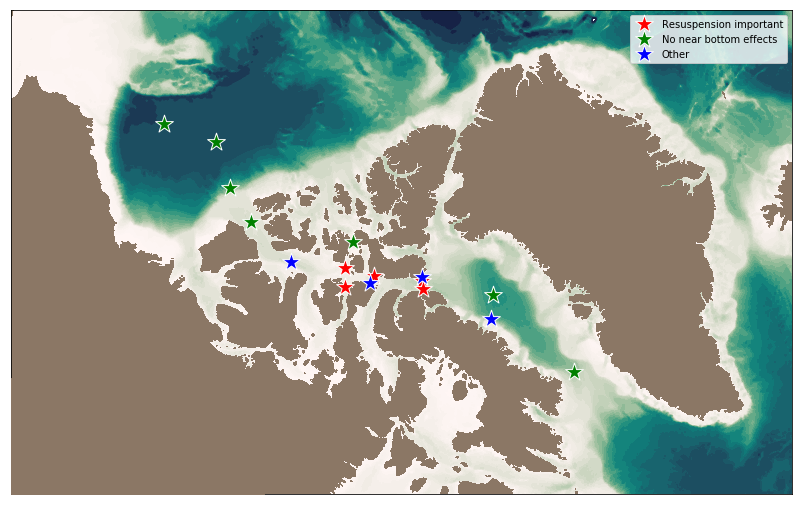

In [20]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -85, resolution='i', width=5.0e6, height=3.1e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

clevels=[0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, \
         1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400]
proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
plt.fill_between([0, 1.62e6], [0, 0], [747012, 747012], color=["#8b7765"], zorder=3)

lons1 = [lons[stn_names=='CAA2'], lons[stn_names=='CAA3'], lons[stn_names=='CAA5'], \
        lons[stn_names=='CAA6'], lons[stn_names=='CAA7']]
lats1 = [lats[stn_names=='CAA2'], lats[stn_names=='CAA3'], lats[stn_names=='CAA5'], \
        lats[stn_names=='CAA6'], lats[stn_names=='CAA7']]
lons2 = [lons[stn_names=='CAA9'], lons[stn_names=='CB1'], lons[stn_names=='CB2']\
        ,lons[stn_names=='CB3'], lons[stn_names=='CB4'], lons[stn_names=='BB1'], lons[stn_names=='BB2']]
lats2 = [lats[stn_names=='CAA9'], lats[stn_names=='CB1'], lats[stn_names=='CB2']\
        ,lats[stn_names=='CB3'], lats[stn_names=='CB4'], lats[stn_names=='BB1'], lats[stn_names=='BB2']]
lons3 = [lons[stn_names=='CAA4'], lons[stn_names=='CAA1'], lons[stn_names=='CAA8'], lons[stn_names=='BB3']]
lats3 = [lats[stn_names=='CAA4'], lats[stn_names=='CAA1'], lats[stn_names=='CAA8'], lats[stn_names=='BB3']]

x1, y1 = proj(lons1, lats1)
x2, y2 = proj(lons2, lats2)
x3, y3 = proj(lons3, lats3)

proj.scatter(x1, y1, s=350, marker='*', c='r', edgecolors='w', zorder=4, label='Resuspension important')
proj.scatter(x2, y2, s=350, marker='*', c='g', edgecolors='w', zorder=4, label='No near bottom effects')
proj.scatter(x3, y3, s=350, marker='*', c='b', edgecolors='w', zorder=4, label='Other')

plt.legend()

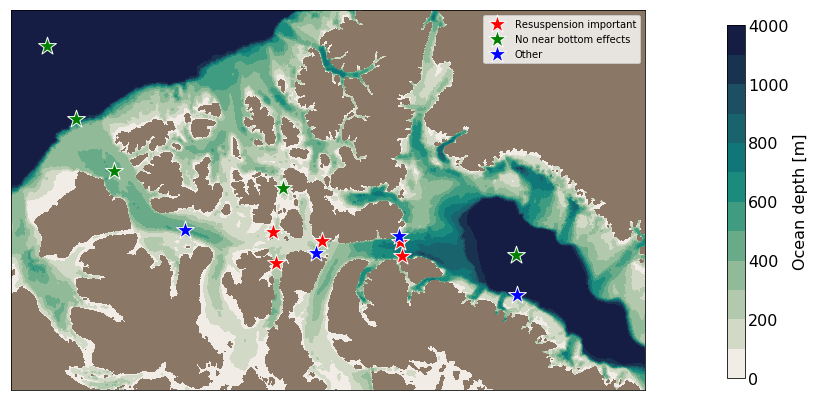

In [21]:
fig,ax = plt.subplots(figsize=(12,7))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=2.50e6, height=1.5e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

clevels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 4000]
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, vmin=0, vmax=1200, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

lons1 = [lons[stn_names=='CAA2'], lons[stn_names=='CAA3'], lons[stn_names=='CAA5'], \
        lons[stn_names=='CAA6'], lons[stn_names=='CAA7']]
lats1 = [lats[stn_names=='CAA2'], lats[stn_names=='CAA3'], lats[stn_names=='CAA5'], \
        lats[stn_names=='CAA6'], lats[stn_names=='CAA7']]
lons2 = [lons[stn_names=='CAA9'], lons[stn_names=='CB1'], lons[stn_names=='CB2']\
        ,lons[stn_names=='CB3'], lons[stn_names=='CB4'], lons[stn_names=='BB1'], lons[stn_names=='BB2']]
lats2 = [lats[stn_names=='CAA9'], lats[stn_names=='CB1'], lats[stn_names=='CB2']\
        ,lats[stn_names=='CB3'], lats[stn_names=='CB4'], lats[stn_names=='BB1'], lats[stn_names=='BB2']]
lons3 = [lons[stn_names=='CAA4'], lons[stn_names=='CAA1'], lons[stn_names=='CAA8'], lons[stn_names=='BB3']]
lats3 = [lats[stn_names=='CAA4'], lats[stn_names=='CAA1'], lats[stn_names=='CAA8'], lats[stn_names=='BB3']]

x1, y1 = proj(lons1, lats1)
x2, y2 = proj(lons2, lats2)
x3, y3 = proj(lons3, lats3)

proj.scatter(x1, y1, s=350, marker='*', c='r', edgecolors='w', zorder=4, label='Resuspension important')
proj.scatter(x2, y2, s=350, marker='*', c='g', edgecolors='w', zorder=4, label='No near bottom effects')
proj.scatter(x3, y3, s=350, marker='*', c='b', edgecolors='w', zorder=4, label='Other')
plt.legend()

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

# ArcticNet transmissivity data from Polar Data Catalogue

In [23]:
folder_ArcticNet = '/ocean/brogalla/GEOTRACES/data/ArcticNet/'
# sub1 = 'ArcticNet0904a_CTD_CanadianArcticBaffinBay_v20140523/'
sub2 = 'ArcticNet1003b_CTD_NorthWestPassage-v20140523/'
sub3 = 'ArcticNet0904a_CTD_CanadianArcticBaffinBay_v20140923/'
sub4 = 'ArcticNet1101_CTD_BaffinBay_NorthwestPassage_v20140922/'
sub5 = 'ArcticNet1001b_CTD_NorthWestPassage_v20140523/'
sub6 = 'ArcticNet1103b_ CTD_BaffinBay_NorthwestPassage_v20140922/'

List of filenames for each of these datasets

In [24]:
# files1 = glob.glob(folder_ArcticNet+sub1+'*.int')
files2 = glob.glob(folder_ArcticNet+sub2+'*.int')
files3 = glob.glob(folder_ArcticNet+sub3+'*.int')
files4 = glob.glob(folder_ArcticNet+sub4+'*.int')
files5 = glob.glob(folder_ArcticNet+sub5+'*.int')
files6 = glob.glob(folder_ArcticNet+sub6+'*.int')

Function to read in data

In [25]:
def read_CTD(files, header_list):
    
    stn_lats=[]
    stn_lons=[]
    data_array=np.empty((len(files),1000,2)) # shape: (file, random length, [pressure, transmissivity])
    data_array[:] = np.nan
    i=0
    
    for file in files:
        stn = pd.read_fwf(file)
        stn = stn.iloc[0:10,1:2]
        lat = stn.iloc[5,:].str.extract('(\d+\.*\d*)', expand=False)
        lon = stn.iloc[6,:].str.extract('(\d+\.*\d*)', expand=False)
        stn_lats = np.append(stn_lats, float(lat))
        stn_lons = np.append(stn_lons, -1*float(lon))
        
        data  = pd.read_table(file, header=int(header_list[i]), sep='\s+')
        data  = data.drop(0) # drop empty row
        data  = data.dropna().astype(float)
        number_rows1 = len(data['Pres'])
        number_rows2 = len(data['Trans'])
        data_array[i,0:number_rows1,0] = np.array(data['Pres'])  # Pressure
        data_array[i,0:number_rows2,1] = np.array(data['Trans']) # Transmissivity
        i+=1
    
    return stn_lats, stn_lons, data_array

In [26]:
# header_list1 = np.ones(len(files1))*12
header_list2 = np.ones(len(files2))*12
header_list3 = np.ones(len(files3))*12
header_list4 = [13, 13, 12, 13, 13, 12, 13, 14, 12, 12, 14, 14, 14, 14, 12, 12, 12, 12, 14, 13, 14,\
                12, 14, 12, 13, 12, 13, 14, 14, 12, 12, 12, 12]
header_list5 = np.ones(len(files5))*12
header_list6 = [13, 13, 13, 14, 13, 14, 14, 13, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,\
                13, 14, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 13, 13, 13, 12, 13, 13, 13, 13, 13, 13, 13, 14]

In [27]:
# stn_lats1, stn_lons1, data_array1 = read_CTD(files1, header_list1)
stn_lats2, stn_lons2, data_array2 = read_CTD(files2, header_list2)
stn_lats3, stn_lons3, data_array3 = read_CTD(files3, header_list3)
stn_lats4, stn_lons4, data_array4 = read_CTD(files4, header_list4)
stn_lats5, stn_lons5, data_array5 = read_CTD(files5, header_list5)
stn_lats6, stn_lons6, data_array6 = read_CTD(files6, header_list6)

In [28]:
colors = ['#40e0d0', '#c71585', '#fdd835', '#9999ff', '#9be137', '#003366']

Look at the transmissivity in the ~ 150 m near the bottom of the CTD casts, grouped by region:
- SS --- Smith Sound
- LS --- Lancaster Sound
- PC --- Parry Channel
- BI --- Baffin Island
- AG --- Amundsen Gulf / Beaufort Sea
- MC --- McClintock Channel

In [29]:
def group_stations(stn_lons, stn_lats):
    
    # Smith Sound:
    SS_ind = np.where(stn_lats > 75)[0]
    
    # Lancaster Sound:
    ind_lat = np.where(np.logical_and(73 < stn_lats, stn_lats < 74.5)) # indices to select
    ind_lon = np.where(np.logical_and(-83 < stn_lons, stn_lons < -76))
    LS_ind = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))
    
    # West Parry Channel:
    ind_lat = np.where(np.logical_and(73 < stn_lats, stn_lats < 74.5)) # indices to select
    ind_lon = np.where(np.logical_and(-112 < stn_lons, stn_lons < -95))
    PC_indW = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))
    
    # East Parry Channel:
    ind_lat = np.where(np.logical_and(73 < stn_lats, stn_lats < 74.5)) # indices to select
    ind_lon = np.where(np.logical_and(-95 < stn_lons, stn_lons < -83))
    PC_indE = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))
    
    # Baffin Island:
    ind_lat = np.where(np.logical_and(55 < stn_lats, stn_lats < 74.5)) # indices to select
    ind_lon = np.where(np.logical_and(-79.5 < stn_lons, stn_lons < -68))
    BI_ind = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))
    
    # Amundsen Gulf:
    ind_lat = np.where(np.logical_and(70 < stn_lats, stn_lats < 73)) # indices to select
    ind_lon = np.where(np.logical_and(-132 < stn_lons, stn_lons < -116))
    AG_ind = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))
    
    # McClintock Channel:
    ind_lat = np.where(np.logical_and(60 < stn_lats, stn_lats < 73)) # indices to select
    ind_lon = np.where(np.logical_and(-116 < stn_lons, stn_lons < -83))
    MC_ind = np.sort(list(set(list(ind_lat[0])).intersection(list(ind_lon[0]))))    
    
    return SS_ind, LS_ind, PC_indW, PC_indE, BI_ind, AG_ind, MC_ind

In [30]:
# SS_ind1, LS_ind1, PC_indW1, PC_indE1, BI_ind1, AG_ind1, MC_ind1 = group_stations(stn_lons1, stn_lats1)
SS_ind2, LS_ind2, PC_indW2, PC_indE2, BI_ind2, AG_ind2, MC_ind2 = group_stations(stn_lons2, stn_lats2)
SS_ind3, LS_ind3, PC_indW3, PC_indE3, BI_ind3, AG_ind3, MC_ind3 = group_stations(stn_lons3, stn_lats3)
SS_ind4, LS_ind4, PC_indW4, PC_indE4, BI_ind4, AG_ind4, MC_ind4 = group_stations(stn_lons4, stn_lats4)
SS_ind5, LS_ind5, PC_indW5, PC_indE5, BI_ind5, AG_ind5, MC_ind5 = group_stations(stn_lons5, stn_lats5)
SS_ind6, LS_ind6, PC_indW6, PC_indE6, BI_ind6, AG_ind6, MC_ind6 = group_stations(stn_lons6, stn_lats6)

In [31]:
col1 = ['#f3a447', '#e7bc29', '#d092a7', '#9c85c0', '#809ec2', '#40e0d0']

In [32]:
def plot_station_groups(proj, stn_lons, stn_lats, num, colors=col1):
    SS_ind, LS_ind, PC_indW, PC_indE, BI_ind, AG_ind, MC_ind = group_stations(stn_lons, stn_lats)

#     if len(SS_ind) > 0:
#         xSS, ySS = proj(stn_lons[SS_ind], stn_lats[SS_ind])
#         proj.scatter(xSS, ySS, s=350, marker='*', c=colors[0], edgecolors='w', zorder=4, label='Smith Sound')
#         proj.scatter(0, 0, s=350, marker='*', c=colors[5], edgecolors='w', zorder=1, label='McClintock Channel')
#     if len(LS_ind) > 0:    
#         xLS, yLS = proj(stn_lons[LS_ind], stn_lats[LS_ind])
#         proj.scatter(xLS, yLS, s=350, marker='*', c=colors[1], edgecolors='w', zorder=4, label='Lancaster Sound')
    if len(PC_indW) > 0:
        xPCW, yPCW = proj(stn_lons[PC_indW], stn_lats[PC_indW])
        proj.scatter(xPCW, yPCW, s=350, marker='*', c=colors[2], edgecolors='w', zorder=4, label='West Parry Channel')
    if len(PC_indE) > 0:
        xPCE, yPCE = proj(stn_lons[PC_indE], stn_lats[PC_indE])
        proj.scatter(xPCE, yPCE, s=350, marker='*', c=colors[3], edgecolors='w', zorder=4, label='East Parry Channel')
#     if len(BI_ind) > 0:
#         xBI, yBI = proj(stn_lons[BI_ind], stn_lats[BI_ind])
#         proj.scatter(xBI, yBI, s=350, marker='*', c=colors[3], edgecolors='w', zorder=4, label='Baffin Island')
#     if len(AG_ind) > 0:
#         xAG, yAG = proj(stn_lons[AG_ind], stn_lats[AG_ind])
#         proj.scatter(xAG, yAG, s=350, marker='*', c=colors[4], edgecolors='w', zorder=4, label='Amundsen Gulf')
#     if len(MC_ind) > 0:
#         xMC, yMC = proj(stn_lons[MC_ind], stn_lats[MC_ind])
#         proj.scatter(xMC, yMC, s=350, marker='*', c=colors[5], edgecolors='w', zorder=4, label='McClintock Channel')
    
    if num=='1':
        plt.legend()
    return

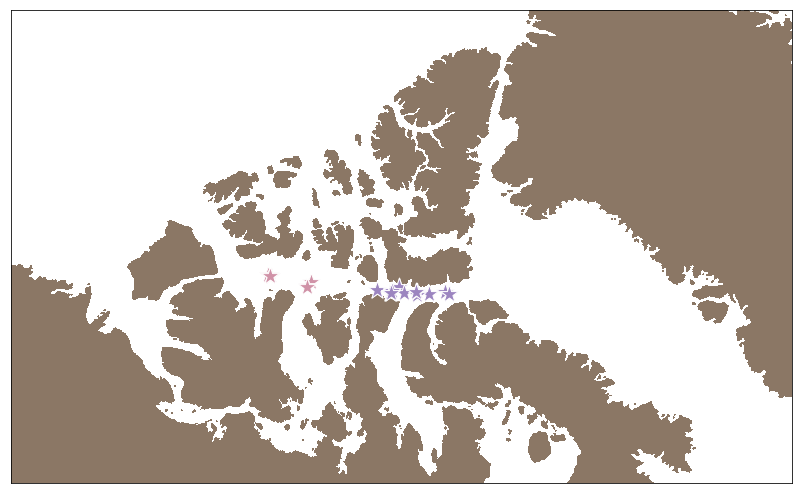

In [33]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=3.30e6, height=2.0e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
# plot_station_groups(proj, stn_lons1, stn_lats1, '1')
plot_station_groups(proj, stn_lons2, stn_lats2, '2')
plot_station_groups(proj, stn_lons3, stn_lats3, '3')
plot_station_groups(proj, stn_lons4, stn_lats4, '4')
plot_station_groups(proj, stn_lons5, stn_lats5, '5')
plot_station_groups(proj, stn_lons6, stn_lats6, '6')

(600, 0)

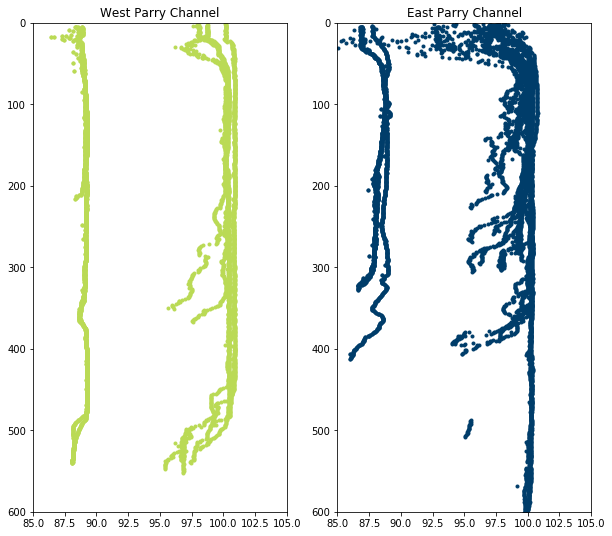

In [68]:
fig, ax = plt.subplots(1,2,figsize=(10,9))

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_title('West Parry Channel')
ax[1].set_title('East Parry Channel')

ax[0].plot(data_array1[PC_indW1,:,1], data_array1[PC_indW1,:,0], '.', c='#bada55')
ax[0].plot(data_array2[PC_indW2,:,1], data_array2[PC_indW2,:,0], '.', c='#bada55')
ax[0].plot(data_array3[PC_indW3,:,1], data_array3[PC_indW3,:,0], '.', c='#bada55')
# ax[0].plot(data_array4[PC_indW4,:,1], data_array4[PC_indW4,:,0], '.', c='#bada55')
# ax[0].plot(data_array5[PC_indW5,:,1], data_array5[PC_indW5,:,0], '.', c='#bada55')
ax[0].plot(data_array6[PC_indW6,:,1], data_array6[PC_indW6,:,0], '.', c='#bada55')

ax[1].plot(data_array1[PC_indE1,:,1], data_array1[PC_indE1,:,0], '.', c='#003d6a')
ax[1].plot(data_array2[PC_indE2,:,1], data_array2[PC_indE2,:,0], '.', c='#003d6a')
ax[1].plot(data_array3[PC_indE3,:,1], data_array3[PC_indE3,:,0], '.', c='#003d6a')
ax[1].plot(data_array4[PC_indE4,:,1], data_array4[PC_indE4,:,0], '.', c='#003d6a')
ax[1].plot(data_array5[PC_indE5,:,1], data_array5[PC_indE5,:,0], '.', c='#003d6a')
ax[1].plot(data_array6[PC_indE6,:,1], data_array6[PC_indE6,:,0], '.', c='#003d6a')

ax[0].set_xlim([85,105])
ax[0].set_ylim([600,0])
ax[1].set_xlim([85,105])
ax[1].set_ylim([600,0])
# fig.text(0.41, 0.01, 'Transmissivity [%]', va='center', fontsize=18);
# fig.text(0.08, 0.5, 'Last 100 m of cast [press]', va='center', rotation='vertical',fontsize=18);

In [34]:
# bottom1 = (~np.isnan(data_array1[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T
bottom2 = (~np.isnan(data_array2[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T
bottom3 = (~np.isnan(data_array3[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T
bottom4 = (~np.isnan(data_array4[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T
bottom5 = (~np.isnan(data_array5[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T
bottom6 = (~np.isnan(data_array6[:,:,0])).sum(axis = 1) - 1 # should be identical for both P and T

In [35]:
def plot_bottom(stn_lons, stn_lats, bottom, data_array):
    SS_ind, LS_ind, PC_ind, BI_ind, AG_ind, MC_ind = group_stations(stn_lons, stn_lats)
    
    for stn in SS_ind:
        ind1 = bottom[stn]-100
        ind2 = bottom[stn]
        ax[0].plot(data_array[stn,ind1:ind2,1], np.linspace(0,100,len(data_array[stn,ind1:ind2,1])))
        
    for stn in LS_ind:
        ind1 = bottom[stn]-100
        ind2 = bottom[stn]
        ax[1].plot(data_array[stn,ind1:ind2,1], np.linspace(0,100,len(data_array[stn,ind1:ind2,1])))
        
    for stn in PC_ind:
        ind1 = bottom[stn]-100
        ind2 = bottom[stn]
        ax[2].plot(data_array[stn,ind1:ind2,1], np.linspace(0,100,len(data_array[stn,ind1:ind2,1])))        
    
    for stn in BI_ind:
        ind1 = bottom[stn]-100
        ind2 = bottom[stn]
        ax[3].plot(data_array[stn,ind1:ind2,1], np.linspace(0,100,len(data_array[stn,ind1:ind2,1])))    
    
    for stn in AG_ind:
        ind1 = bottom[stn]-100
        ind2 = bottom[stn]
        ax[4].plot(data_array[stn,ind1:ind2,1], np.linspace(0,100,len(data_array[stn,ind1:ind2,1])))    
    return

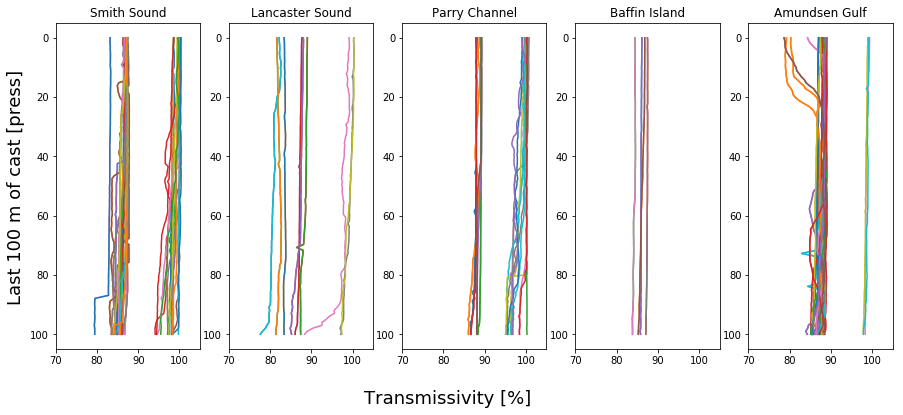

In [25]:
fig, ax = plt.subplots(1,5,figsize=(15,6))

for axs in [ax[0], ax[1], ax[2], ax[3], ax[4]]:
    axs.invert_yaxis()
    axs.set_xlim([70, 105])

plot_bottom(stn_lons1, stn_lats1, bottom1, data_array1)
plot_bottom(stn_lons2, stn_lats2, bottom2, data_array2)
plot_bottom(stn_lons3, stn_lats3, bottom3, data_array3)
plot_bottom(stn_lons5, stn_lats5, bottom5, data_array5)
    
ax[0].set_title('Smith Sound')
ax[1].set_title('Lancaster Sound')
ax[2].set_title('Parry Channel')
ax[3].set_title('Baffin Island')
ax[4].set_title('Amundsen Gulf')

fig.text(0.41, 0.01, 'Transmissivity [%]', va='center', fontsize=18);
fig.text(0.08, 0.5, 'Last 100 m of cast [press]', va='center', rotation='vertical',fontsize=18);

Sediment resuspension does not appear to be important along the Baffin Island coast. In some Lancaster Sound profiles it is definitely important, some Parry Channel, Amundsen Gulf, and Smith Sound.

### Look more specifically at Lancaster Sound:

In [24]:
LS_lon1  = stn_lons1[LS_ind1]
LS_lat1  = stn_lats1[LS_ind1]
LS_P1    = data_array1[LS_ind1,:,0]
LS_Tr1   = data_array1[LS_ind1,:,1] 

In [25]:
LS_lon2  = stn_lons2[LS_ind2]
LS_lat2  = stn_lats2[LS_ind2]
LS_P2    = data_array2[LS_ind2,:,0]
LS_Tr2   = data_array2[LS_ind2,:,1] 

In [26]:
LS_lon3  = stn_lons3[LS_ind3]
LS_lat3  = stn_lats3[LS_ind3]
LS_P3    = data_array3[LS_ind3,:,0]
LS_Tr3   = data_array3[LS_ind3,:,1] 

In [27]:
LS_lon4  = stn_lons4[LS_ind4]
LS_lat4  = stn_lats4[LS_ind4]
LS_P4    = data_array4[LS_ind4,:,0]
LS_Tr4   = data_array4[LS_ind4,:,1] 

In [28]:
LS_lon6  = stn_lons6[LS_ind6]
LS_lat6  = stn_lats6[LS_ind6]
LS_P6    = data_array6[LS_ind6,:,0]
LS_Tr6   = data_array6[LS_ind6,:,1] 

In [29]:
c1 = [colors[0], colors[0], colors[0], colors[0], colors[0], colors[0]]
c2 = [colors[1], colors[1], colors[1], colors[1], colors[1], colors[1]]
c3 = [colors[2], colors[2], colors[2], colors[2], colors[2], colors[2]]
c4 = [colors[3], colors[3], colors[3], colors[3], colors[3], colors[3]]
c5 = [colors[4], colors[4], colors[4], colors[4], colors[4], colors[4]]
c6 = [colors[5], colors[5], colors[5], colors[5], colors[5], colors[5]]

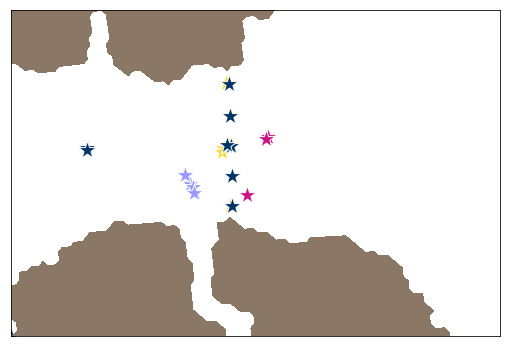

In [285]:
fig,ax = plt.subplots(figsize=(10,6))

proj=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -80, resolution='i', width=0.30e6, height=0.2e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
plot_station_groups(proj, stn_lons1, stn_lats1, '2', colors=c1)
plot_station_groups(proj, stn_lons2, stn_lats2, '2', colors=c2)
plot_station_groups(proj, stn_lons3, stn_lats3, '3', colors=c3)
plot_station_groups(proj, stn_lons4, stn_lats4, '4', colors=c4)
plot_station_groups(proj, stn_lons6, stn_lats6, '6', colors=c6)

In [30]:
def find_index_LS(stn_lats):
    ind11 = np.where(stn_lats < 73.9)[0]
    ind21 = np.where(np.logical_and(stn_lats > 73.9, stn_lats < 74.15))[0]
    ind31 = np.where(np.logical_and(stn_lats > 74.15, stn_lats < 74.25))[0]
    ind41 = np.where(np.logical_and(stn_lats > 74.25, stn_lats < 74.4))[0]
    ind51 = np.where(stn_lats > 74.4)[0]
    
    return ind11, ind21, ind31, ind41, ind51

Lancaster Sound stations from file 1 and file 3 are the same.

From South to North:

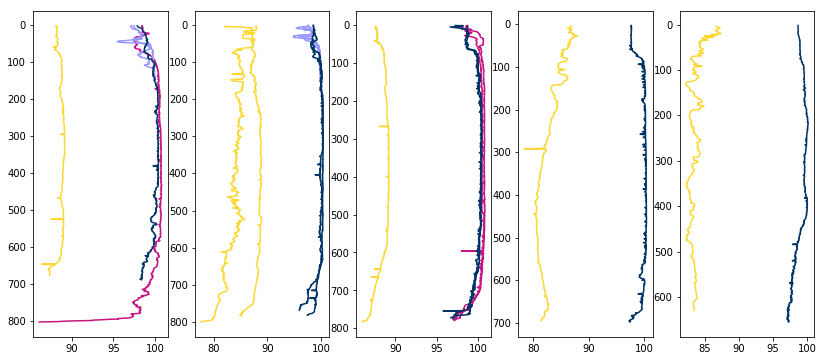

In [32]:
fig, ax = plt.subplots(1,5, figsize=(14,6))

for axs in [ax[0], ax[1], ax[2], ax[3], ax[4]]:
    axs.invert_yaxis()
    
ind21, ind22, ind23, ind24, ind25 = find_index_LS(LS_lat2)
ind31, ind32, ind33, ind34, ind35 = find_index_LS(LS_lat3)
ind41, ind42, ind43, ind44, ind45 = find_index_LS(LS_lat4)
ind61, ind62, ind63, ind64, ind65 = find_index_LS(LS_lat6)

for stn in ind21:
    ax[0].plot(LS_Tr2[stn,:], LS_P2[stn,:], colors[1]);
for stn in ind31:
    ax[0].plot(LS_Tr3[stn,:], LS_P3[stn,:], colors[2]);
for stn in ind41:
    ax[0].plot(LS_Tr4[stn,:], LS_P4[stn,:], colors[3]);
for stn in ind61:
    ax[0].plot(LS_Tr6[stn,:], LS_P6[stn,:], colors[5]);

for stn in ind22:
    ax[1].plot(LS_Tr2[stn,:], LS_P2[stn,:], colors[1]);
for stn in ind32:
    ax[1].plot(LS_Tr3[stn,:], LS_P3[stn,:], colors[2]);
for stn in ind42:
    ax[1].plot(LS_Tr4[stn,:], LS_P4[stn,:], colors[3]);
for stn in ind62:
    ax[1].plot(LS_Tr6[stn,:], LS_P6[stn,:], colors[5]);

for stn in ind23:
    ax[2].plot(LS_Tr2[stn,:], LS_P2[stn,:], colors[1]);
for stn in ind33:
    ax[2].plot(LS_Tr3[stn,:], LS_P3[stn,:], colors[2]);
for stn in ind43:
    ax[2].plot(LS_Tr4[stn,:], LS_P4[stn,:], colors[3]);
for stn in ind63:
    ax[2].plot(LS_Tr6[stn,:], LS_P6[stn,:], colors[5]);
        
for stn in ind24:
    ax[3].plot(LS_Tr2[stn,:], LS_P2[stn,:], colors[1]);
for stn in ind34:
    ax[3].plot(LS_Tr3[stn,:], LS_P3[stn,:], colors[2]);
for stn in ind44:
    ax[3].plot(LS_Tr4[stn,:], LS_P4[stn,:], colors[3]);
for stn in ind64:
    ax[3].plot(LS_Tr6[stn,:], LS_P6[stn,:], colors[5]);
    
for stn in ind25:
    ax[4].plot(LS_Tr2[stn,:], LS_P2[stn,:], colors[1]);
for stn in ind35:
    ax[4].plot(LS_Tr3[stn,:], LS_P3[stn,:], colors[2]);
for stn in ind45:
    ax[4].plot(LS_Tr4[stn,:], LS_P4[stn,:], colors[3]);
for stn in ind65:
    ax[4].plot(LS_Tr6[stn,:], LS_P6[stn,:], colors[5]);

## Try to develop a metric for determining when transmissivity profiles indicate that resuspension is important

1. Compare cast depth with bottom depth at the same lat & lon
2. Smooth data
3. Calculate derivative of running average
4. Take the sum of the derivative values for the lowest 50 m and compare with average transmissivity derivative above that.

In [36]:
def find_closest_model_point(
    lon, lat, model_lons, model_lats, grid='NEMO', land_mask=None,
    tols={
        'NEMO': {'tol_lon': 0.104, 'tol_lat': 0.0388},
        'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
        }
):

    if grid not in tols:
        raise KeyError(
            'The provided grid type is not in tols. '
            'Use another grid type or add your grid type to tols.')

    # Search for a grid point with longitude and latitude within
    # tolerance of measured location
    j_list, i_list = np.where(
        np.logical_and(
            (np.logical_and(model_lons > lon - tols[grid]['tol_lon'],
                            model_lons < lon + tols[grid]['tol_lon'])),
            (np.logical_and(model_lats > lat - tols[grid]['tol_lat'],
                            model_lats < lat + tols[grid]['tol_lat']))
        )
    )

    if len(j_list) == 0:
        # Added by BMM March 2017
        # If including points outside of domain:
        return np.nan, np.nan
        # raise ValueError(
        #    'No model point found. tol_lon/tol_lat too small or '
        #    'lon/lat outside of domain.')
    try:
        j, i = map(np.asscalar, (j_list, i_list))
    except ValueError:
        # Several points within tolerance
        # Calculate distances for all and choose the closest

        # Avoiding array indexing because some functions
        # pass in model_lons and model_lats as netcdf4 objects
        # (which treat 'model_lons[j_list, i_list]' differently)
        lons = [model_lons[j_list[n], i_list[n]] for n in range(len(j_list))]
        lats = [model_lats[j_list[n], i_list[n]] for n in range(len(j_list))]
        dists = haversine(
            np.array([lon] * i_list.size), np.array([lat] * j_list.size),
            lons, lats)
        n = dists.argmin()
        j, i = map(np.asscalar, (j_list[n], i_list[n]))

    # If point is on land and land mask is provided
    # try to find closest water point
    if land_mask is None or not land_mask[j, i]:
        return j, i
    try:
        return _spiral_search_for_closest_water_point(
            j, i, land_mask, lon, lat, model_lons, model_lats)
    except ValueError:
        raise ValueError(
            'lat/lon on land and no nearby water point found')


In [37]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [38]:
def find_bathy(stn, bottom, stn_lons, stn_lats, mesh_lon=mesh_lon, mesh_lat=mesh_lat):
    
    cast_depth = bottom[stn]
    lon = stn_lons[stn]
    lat = stn_lats[stn]
    
    # Find bathymetry
    i, j        = find_closest_model_point(lon, lat, mesh_lon, mesh_lat)
    bathy_depth = mesh_bathy[i,j]
    
    return bathy_depth, cast_depth

In [38]:
# cruise1_bathy=[]
# cruise1_cast =[]

# for i in range(0,len(bottom1)):
#     bathy, cast   = find_bathy(i, bottom1, stn_lons1, stn_lats1)
#     cruise1_bathy = np.append(cruise1_bathy, bathy)
#     cruise1_cast  = np.append(cruise1_cast, cast)

In [39]:
cruise2_bathy=[]
cruise2_cast =[]

for i in range(0,len(bottom2)):
    bathy, cast   = find_bathy(i, bottom2, stn_lons2, stn_lats2)
    cruise2_bathy = np.append(cruise2_bathy, bathy)
    cruise2_cast  = np.append(cruise2_cast, cast)

In [40]:
cruise3_bathy=[]
cruise3_cast =[]

for i in range(0,len(bottom3)):
    bathy, cast   = find_bathy(i, bottom3, stn_lons3, stn_lats3)
    cruise3_bathy = np.append(cruise3_bathy, bathy)
    cruise3_cast  = np.append(cruise3_cast, cast)

In [41]:
cruise4_bathy=[]
cruise4_cast =[]

for i in range(0,len(bottom4)):
    bathy, cast   = find_bathy(i, bottom4, stn_lons4, stn_lats4)
    cruise4_bathy = np.append(cruise4_bathy, bathy)
    cruise4_cast  = np.append(cruise4_cast, cast)

In [42]:
cruise5_bathy=[]
cruise5_cast =[]

for i in range(0,len(bottom5)):
    bathy, cast   = find_bathy(i, bottom5, stn_lons5, stn_lats5)
    cruise5_bathy = np.append(cruise5_bathy, bathy)
    cruise5_cast  = np.append(cruise5_cast, cast)

In [43]:
cruise6_bathy=[]
cruise6_cast =[]

for i in range(0,len(bottom6)):
    bathy, cast   = find_bathy(i, bottom6, stn_lons6, stn_lats6)
    cruise6_bathy = np.append(cruise6_bathy, bathy)
    cruise6_cast  = np.append(cruise6_cast, cast)

In [44]:
# depth_diff1 = np.abs(cruise1_bathy - cruise1_cast)
depth_diff2 = np.abs(cruise2_bathy - cruise2_cast)
depth_diff3 = np.abs(cruise3_bathy - cruise3_cast)
depth_diff4 = np.abs(cruise4_bathy - cruise4_cast)
depth_diff5 = np.abs(cruise5_bathy - cruise5_cast)
depth_diff6 = np.abs(cruise6_bathy - cruise6_cast)

1. Stations with casts within about 30 m of the ocean floor:

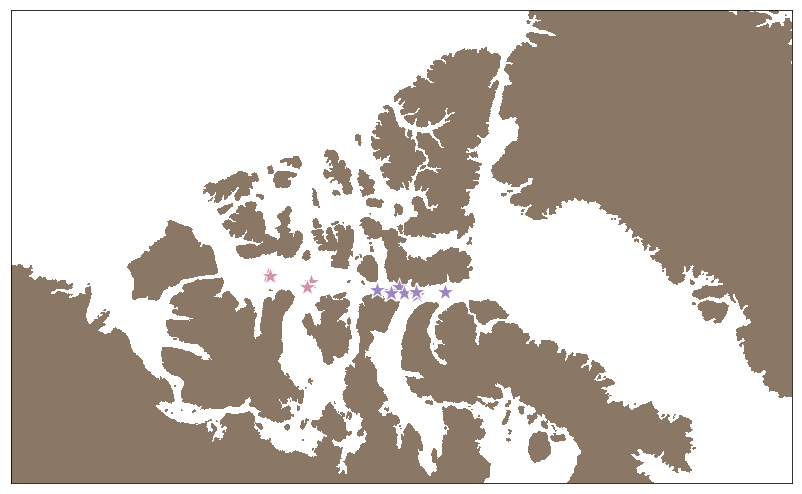

In [45]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=3.30e6, height=2.0e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)
# plot_station_groups(proj, stn_lons1[depth_diff1 < 30], stn_lats1[depth_diff1 < 30], '1')
plot_station_groups(proj, stn_lons2[depth_diff2 < 30], stn_lats2[depth_diff2 < 30], '2')
plot_station_groups(proj, stn_lons3[depth_diff3 < 30], stn_lats3[depth_diff3 < 30], '3')
plot_station_groups(proj, stn_lons4[depth_diff4 < 30], stn_lats4[depth_diff4 < 30], '4')
plot_station_groups(proj, stn_lons5[depth_diff5 < 30], stn_lats5[depth_diff5 < 30], '5')
plot_station_groups(proj, stn_lons6[depth_diff6 < 30], stn_lats6[depth_diff6 < 30], '6')

2. Smooth data of casts that reach near the bottom

In [46]:
def smooth_cruise(data_array, depth_diff):
    # smooth all data from one cruise
    transmis_filt = np.empty((len(data_array[depth_diff<10,0,0]), 1000, 1))
    depth_filt    = np.empty((len(data_array[depth_diff<10,0,0]), 1000, 1))

    data_arraym = data_array[depth_diff<10,:,:]
    for stn in range(0, len(data_array[depth_diff<10,0,0])):

        # filter data with savitzky-golay filter:
        if len(data_array[stn,:,1][~np.isnan(data_array[stn,:,1])]) > 121:
            transmis_filtered1 = savgol_filter(data_array[stn,:,1][~np.isnan(data_array[stn,:,1])], 121, 3)
            transmis_filtered = transmis_filtered1[~np.isnan(transmis_filtered1)]
            number_rows = len(transmis_filtered)

            transmis_filt[stn, 0:number_rows, 0] = transmis_filtered
            depth_filt[stn, 0:number_rows, 0]    = data_array[stn, :, 0][~np.isnan(data_array[stn,:,1])]\
                                                                        [~np.isnan(transmis_filtered1)] 
        else:
            transmis_filt[stn, 0, 0] = 0
            depth_filt[stn, 0, 0]    = 0
            
    return transmis_filt, depth_filt

In [47]:
# transmis_filt1, depth_filt1 = smooth_cruise(data_array1, depth_diff1)
transmis_filt2, depth_filt2 = smooth_cruise(data_array2, depth_diff2)
transmis_filt3, depth_filt3 = smooth_cruise(data_array3, depth_diff3)
transmis_filt4, depth_filt4 = smooth_cruise(data_array4, depth_diff4)
transmis_filt5, depth_filt5 = smooth_cruise(data_array5, depth_diff5)
transmis_filt6, depth_filt6 = smooth_cruise(data_array6, depth_diff6)

3. Calculate the derivative of the smoothed data

In [48]:
def plot_deriv(stn, data_array, transmis_filt, depth_filt):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,6))
    ax1.invert_yaxis()
    #Original data
    ax1.plot(data_array[stn, :, 1][~np.isnan(data_array[stn,:,1])], \
         data_array[stn, :, 0][~np.isnan(data_array[stn,:,1])], colors[1])

    #Remove any values way out of range
    a  = transmis_filt[stn, :, 0]
    xa = a[a < 100]
    xb = xa[xa > 40]
    a1 = depth_filt[stn, :, 0]
    ya = a1[a < 100]
    yb = ya[xa > 40]
    
    #Plot profiles:
    ax1.plot(xb, yb)
    ax1.set_ylabel('Depth [m]')
    ax1.set_xlabel('Transmissivity [%]')
    ax1.set_title('Profile')

    ax2.invert_yaxis()
    ax2.set_ylabel('Depth [m]')
    ax2.set_xlabel('dT/dz [%/m]')
    
    # Calculate the derivative:
    deriv_T = np.gradient(xb)
    # remove ridiculous derivatives
    deriv_T[deriv_T > 0.2] = np.nan
    deriv_T[deriv_T < -0.2] = np.nan
    
    ax2.plot(deriv_T, yb)
    ax2.plot([0, 0], [np.min(yb), np.max(yb)], '--k')
    ax2.set_title('Derivative')    
    return

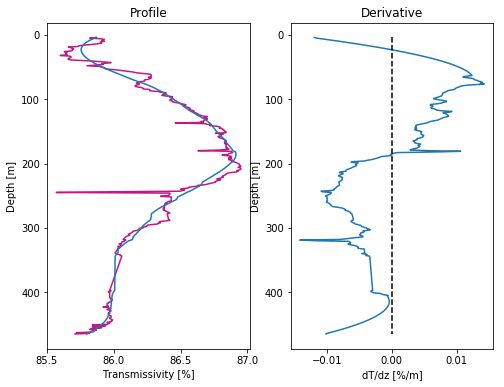

In [74]:
plot_deriv(5, data_array1, transmis_filt1, depth_filt1)

4. Take the sum of the derivative values for the lowest 50 m and compare with average transmissivity derivative above that.

In [49]:
def sum_deriv(stn, transmis_filt):
    # Remove any values way out of range
    a  = transmis_filt[stn, :, 0]
    xa = a[a < 100]
    xb = xa[xa > 40]

    # Calculate the derivative:
    deriv_T = np.gradient(xb)
    # remove ridiculous derivatives
    deriv_T[deriv_T > 0.2] = 0
    deriv_T[deriv_T < -0.2] = 0
    # sum derivatives
    deriv_bot_sum = np.sum(deriv_T[-50:-1])
    deriv_top_sum = np.sum(deriv_T[-100:-50]) 
    
    sed_stn = False
    
    if deriv_bot_sum < deriv_top_sum:
        sed_stn = True
        
    deriv_diff = deriv_bot_sum - deriv_top_sum
        
    return sed_stn, deriv_diff

In [50]:
def calc_cruise_derivs(transmis_filt):
    # List of stations which appear to have sediment resuspension
    sed_stns = []
    sed_diffs= []

    for stn in range(0, len(transmis_filt)):
        ln_sed, deriv_diff = sum_deriv(stn, transmis_filt)
        
        if ln_sed:
            # returns true if sediment resuspension occurs at station
            sed_stns = np.append(sed_stns, int(stn))
        sed_diffs = np.append(sed_diffs, deriv_diff)
    return sed_stns, sed_diffs

In [53]:
# sed_stns1, sed_diffs1 = calc_cruise_derivs(transmis_filt1)
sed_stns2, sed_diffs2 = calc_cruise_derivs(transmis_filt2)
sed_stns3, sed_diffs3 = calc_cruise_derivs(transmis_filt3)
# sed_stns4, sed_diffs4 = calc_cruise_derivs(transmis_filt4)
sed_stns5, sed_diffs5 = calc_cruise_derivs(transmis_filt5)
# sed_stns6, sed_diffs6 = calc_cruise_derivs(transmis_filt6)

In [54]:
print('All stations --- stations with resuspension')
# print('        ', len(transmis_filt1),' --- ', len(sed_stns1))
print('        ', len(transmis_filt2),'  --- ', len(sed_stns2))
print('        ', len(transmis_filt3),' --- ', len(sed_stns3))
# print('        ', len(transmis_filt4),'  --- ', len(sed_stns4))
print('        ', len(transmis_filt5),'  --- ', len(sed_stns5))
# print('        ', len(transmis_filt6),' --- ', len(sed_stns6))

All stations --- stations with resuspension
         4   ---  3
         20  ---  19
         3   ---  2


In [55]:
# stn1_lon = stn_lons1[depth_diff1 < 10]
# sed1_lon = stn1_lon[sed_stns1.astype(int)]
stn2_lon = stn_lons2[depth_diff2 < 10]
sed2_lon = stn2_lon[sed_stns2.astype(int)]
stn3_lon = stn_lons3[depth_diff3 < 10]
sed3_lon = stn3_lon[sed_stns3.astype(int)]
# stn4_lon = stn_lons4[depth_diff4 < 10]
# sed4_lon = stn4_lon[sed_stns4.astype(int)]
stn5_lon = stn_lons5[depth_diff5 < 10]
sed5_lon = stn5_lon[sed_stns5.astype(int)]
# stn6_lon = stn_lons6[depth_diff6 < 10]
# sed6_lon = stn6_lon[sed_stns6.astype(int)]

In [56]:
# stn1_lat = stn_lats1[depth_diff1 < 10]
# sed1_lat = stn1_lat[sed_stns1.astype(int)]
stn2_lat = stn_lats2[depth_diff2 < 10]
sed2_lat = stn2_lat[sed_stns2.astype(int)]
stn3_lat = stn_lats3[depth_diff3 < 10]
sed3_lat = stn3_lat[sed_stns3.astype(int)]
# stn4_lat = stn_lats4[depth_diff4 < 10]
# sed4_lat = stn4_lat[sed_stns4.astype(int)]
stn5_lat = stn_lats5[depth_diff5 < 10]
sed5_lat = stn5_lat[sed_stns5.astype(int)]
# stn6_lat = stn_lats6[depth_diff6 < 10]
# sed6_lat = stn6_lat[sed_stns6.astype(int)]

Map of stations with resuspension:

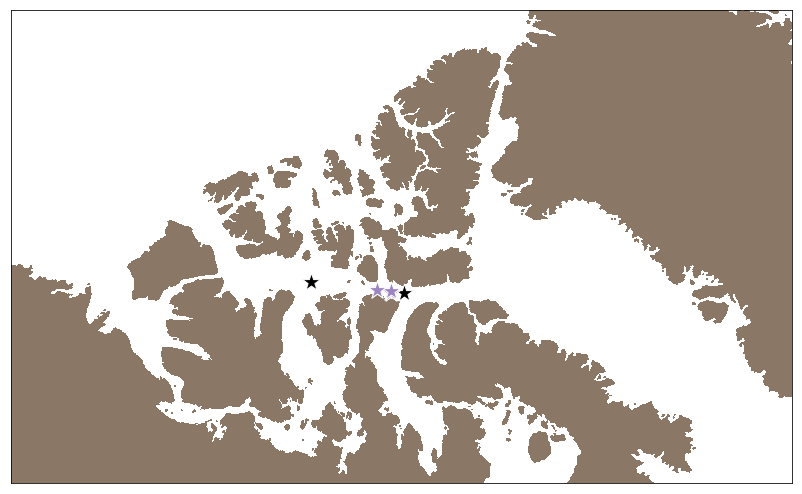

In [65]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=3.30e6, height=2.0e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

# plot all the stations in black
col2 = ['k','k','k','k','k','k']
plot_station_groups(proj, stn_lons1[depth_diff1 < 10], stn_lats1[depth_diff1 < 10], '0', colors=col2)
plot_station_groups(proj, stn_lons2[depth_diff2 < 10], stn_lats2[depth_diff2 < 10], '0', colors=col2)
plot_station_groups(proj, stn_lons3[depth_diff3 < 10], stn_lats3[depth_diff3 < 10], '0', colors=col2)
plot_station_groups(proj, stn_lons4[depth_diff4 < 10], stn_lats4[depth_diff4 < 10], '0', colors=col2)
plot_station_groups(proj, stn_lons5[depth_diff5 < 10], stn_lats5[depth_diff5 < 10], '0', colors=col2)
# plot_station_groups(proj, stn_lons6[depth_diff6 < 10], stn_lats6[depth_diff6 < 10], '0', colors=col2)

# stations with resuspension in color
plot_station_groups(proj, sed1_lon, sed1_lat, '0')
plot_station_groups(proj, sed2_lon, sed2_lat, '2')
plot_station_groups(proj, sed3_lon, sed3_lat, '3')
plot_station_groups(proj, sed4_lon, sed4_lat, '4')
plot_station_groups(proj, sed5_lon, sed5_lat, '5')
# plot_station_groups(proj, sed6_lon, sed6_lat, '6')

Magnitude of importance of resuspension indicated in colour:

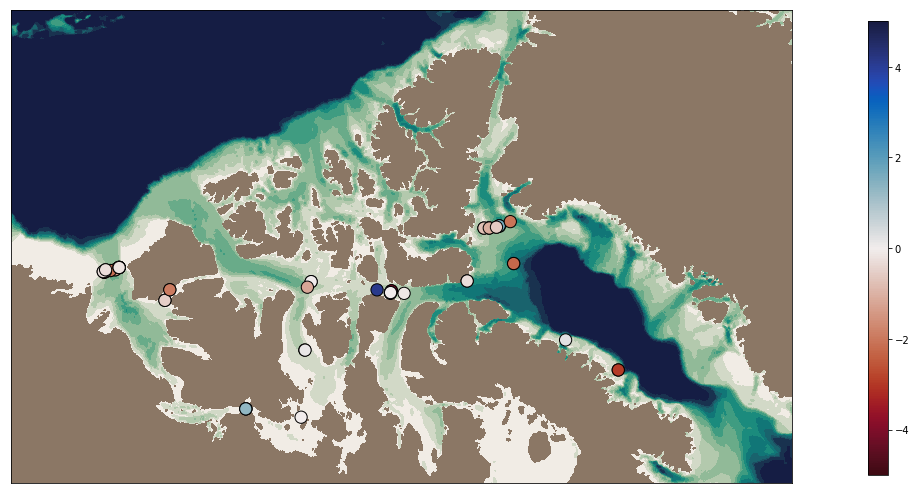

In [100]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=3.30e6, height=2.0e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
clevels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 4000]
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, vmin=0, vmax=1200, cmap=cmocean.cm.tempo, zorder=1)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x1, y1 = proj(stn1_lon, stn1_lat)
x2, y2 = proj(stn2_lon, stn2_lat)
x3, y3 = proj(stn3_lon, stn3_lat)
x5, y5 = proj(stn5_lon, stn5_lat)
x6, y6 = proj(stn6_lon, stn6_lat)

# stations with resuspension in color
CS1 = proj.scatter(x1, y1, c=sed_diffs1, cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x2, y2, c=sed_diffs2, cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x3, y3, c=sed_diffs3, cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x5, y5, c=sed_diffs5, cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x6, y6, c=sed_diffs6, cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax, cax=cbaxes)

Only the stations with stronger values:

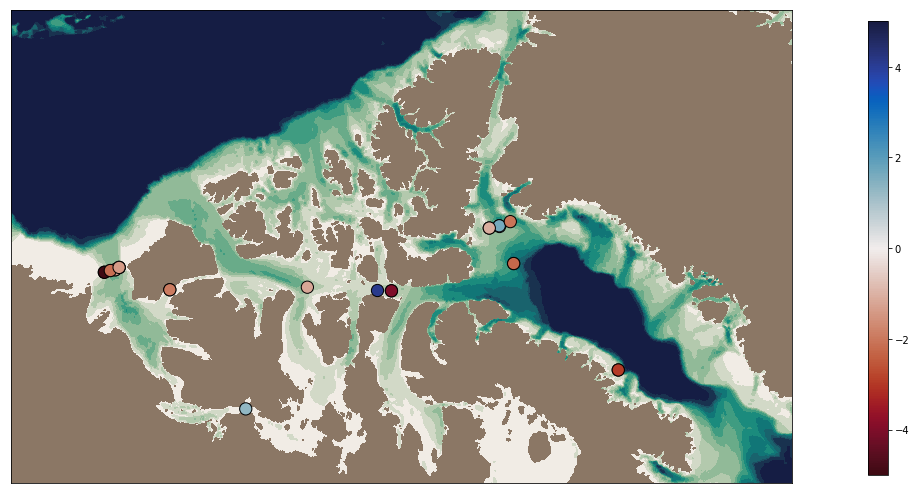

In [99]:
fig,ax = plt.subplots(figsize=(14,9))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=3.30e6, height=2.0e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
clevels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 4000]
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, vmin=0, vmax=1200, cmap=cmocean.cm.tempo, zorder=1)

proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x1, y1 = proj(stn1_lon, stn1_lat)
x2, y2 = proj(stn2_lon, stn2_lat)
x3, y3 = proj(stn3_lon, stn3_lat)
x5, y5 = proj(stn5_lon, stn5_lat)
x6, y6 = proj(stn6_lon, stn6_lat)

# stations with resuspension in color
CS1 = proj.scatter(x1[np.abs(sed_diffs1) > 1], y1[np.abs(sed_diffs1) > 1], c=sed_diffs1[np.abs(sed_diffs1) > 1], \
                   cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x2[np.abs(sed_diffs2) > 1], y2[np.abs(sed_diffs2) > 1], c=sed_diffs2[np.abs(sed_diffs2) > 1], \
             cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x3[np.abs(sed_diffs3) > 1], y3[np.abs(sed_diffs3) > 1], c=sed_diffs3[np.abs(sed_diffs3) > 1], \
             cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x5[np.abs(sed_diffs5) > 1], y5[np.abs(sed_diffs5) > 1], c=sed_diffs5[np.abs(sed_diffs5) > 1], \
             cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')
proj.scatter(x6[np.abs(sed_diffs6) > 1], y6[np.abs(sed_diffs6) > 1], c=sed_diffs6[np.abs(sed_diffs6) > 1], \
             cmap=cmocean.cm.balance_r, s=150, vmin=-5, vmax=5, zorder=4, edgecolor='k')

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax, cax=cbaxes)

Compare with GEOTRACES stations observations:

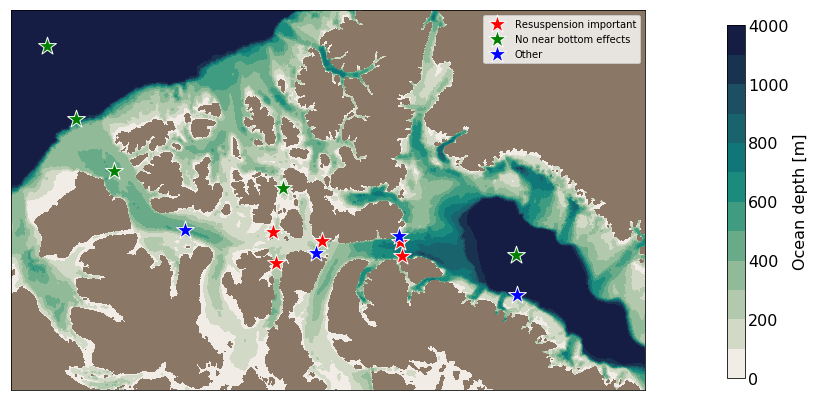

In [25]:
fig,ax = plt.subplots(figsize=(12,7))

proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -90, resolution='i', width=2.50e6, height=1.5e6)
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)

clevels=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 4000]
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy, clevels, vmin=0, vmax=1200, cmap=cmocean.cm.tempo, zorder=1)
proj.contourf(x_mesh, y_mesh, bathy_masked, vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

lons1 = [lons[stn_names=='CAA2'], lons[stn_names=='CAA3'], lons[stn_names=='CAA5'], \
        lons[stn_names=='CAA6'], lons[stn_names=='CAA7']]
lats1 = [lats[stn_names=='CAA2'], lats[stn_names=='CAA3'], lats[stn_names=='CAA5'], \
        lats[stn_names=='CAA6'], lats[stn_names=='CAA7']]
lons2 = [lons[stn_names=='CAA9'], lons[stn_names=='CB1'], lons[stn_names=='CB2']\
        ,lons[stn_names=='CB3'], lons[stn_names=='CB4'], lons[stn_names=='BB1'], lons[stn_names=='BB2']]
lats2 = [lats[stn_names=='CAA9'], lats[stn_names=='CB1'], lats[stn_names=='CB2']\
        ,lats[stn_names=='CB3'], lats[stn_names=='CB4'], lats[stn_names=='BB1'], lats[stn_names=='BB2']]
lons3 = [lons[stn_names=='CAA4'], lons[stn_names=='CAA1'], lons[stn_names=='CAA8'], lons[stn_names=='BB3']]
lats3 = [lats[stn_names=='CAA4'], lats[stn_names=='CAA1'], lats[stn_names=='CAA8'], lats[stn_names=='BB3']]

x1, y1 = proj(lons1, lats1)
x2, y2 = proj(lons2, lats2)
x3, y3 = proj(lons3, lats3)

proj.scatter(x1, y1, s=350, marker='*', c='r', edgecolors='w', zorder=4, label='Resuspension important')
proj.scatter(x2, y2, s=350, marker='*', c='g', edgecolors='w', zorder=4, label='No near bottom effects')
proj.scatter(x3, y3, s=350, marker='*', c='b', edgecolors='w', zorder=4, label='Other')
plt.legend()

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

# Bottom depth vs. Transmissivity:

In [54]:
def bottom_trans(ax, data_array, depth_diff, bottom, cruise_bathy, color):
    data_x1 = data_array[depth_diff < 30, :, 1]
    data_y1 = data_array[depth_diff < 30, :, 0]
    data_y2 = cruise_bathy[depth_diff < 30]
    bot1 = bottom[depth_diff < 30]
    
    for i in range(0, len(bot1)):
        if i!=4: # necessary to avoid some weird error
            # calculate average over bottom 10 m:
            ind1 = np.where(data_y1[i,:]==bot1[i])
            ind2 = ind1[0][0]-5
            ax.plot(np.average(data_x1[i, ind2:ind1[0][0]]) - np.average(data_x1[i, ind2-80:ind2]),\
                data_y2[i], '.', c=color, markersize=18, markeredgecolor='k')
       # data_y1[i, data_y1[i,:]==bot1[i]], '.', markersize=10)
        
    return

Text(0.5, 0, 'Normalized importance of resuspension')

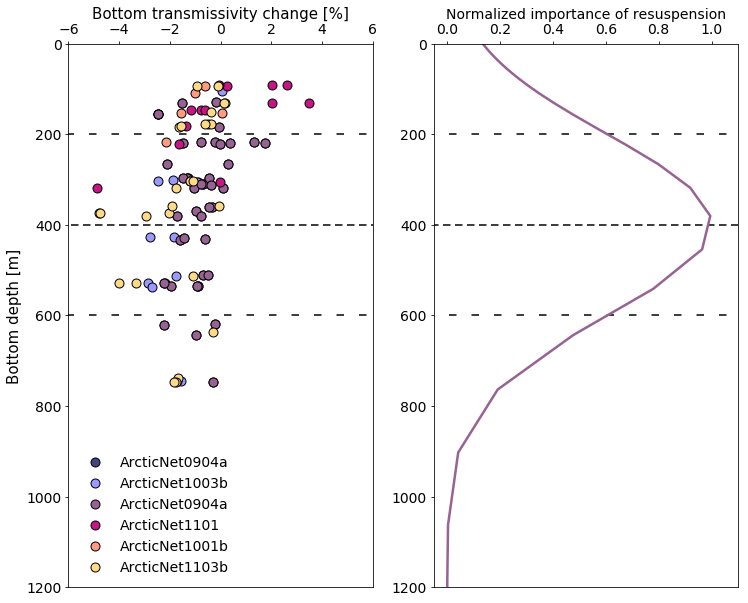

In [75]:
fig, ax = plt.subplots(1,2,figsize=(12,10))

ax[0].invert_yaxis()

c = ['#feda84', '#ff9b83', colors[1], '#976393', colors[3], '#43457f']

bottom_trans(ax[0], data_array1, depth_diff1, bottom1, cruise1_bathy, c[5])
bottom_trans(ax[0], data_array2, depth_diff2, bottom2, cruise2_bathy, c[4])
bottom_trans(ax[0], data_array3, depth_diff3, bottom3, cruise3_bathy, c[3])
bottom_trans(ax[0], data_array4, depth_diff4, bottom4, cruise4_bathy, c[2])
bottom_trans(ax[0], data_array5, depth_diff5, bottom5, cruise5_bathy, c[1])
bottom_trans(ax[0], data_array6, depth_diff6, bottom6, cruise6_bathy, c[0])

# entries for legend:
ax[0].plot(-20,0, '.', c=c[5], markersize=18, markeredgecolor='k', label='ArcticNet0904a')
ax[0].plot(-20,0, '.', c=c[4], markersize=18, markeredgecolor='k', label='ArcticNet1003b')
ax[0].plot(-20,0, '.', c=c[3], markersize=18, markeredgecolor='k', label='ArcticNet0904a')
ax[0].plot(-20,0, '.', c=c[2], markersize=18, markeredgecolor='k', label='ArcticNet1101')
ax[0].plot(-20,0, '.', c=c[1], markersize=18, markeredgecolor='k', label='ArcticNet1001b')
ax[0].plot(-20,0, '.', c=c[0], markersize=18, markeredgecolor='k', label='ArcticNet1103b')
ax[0].legend(fontsize=14, frameon=False)

# horizontal lines:
ax[0].plot([-10, 10], [400, 400], '--k', dashes=(5, 3), zorder=1)
ax[0].plot([-10, 10], [600, 600], '--k', dashes=(5, 10), zorder=1)
ax[0].plot([-10, 10], [200, 200], '--k', dashes=(5, 10), zorder=1)

ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].xaxis.set_label_position('top') 
ax[0].xaxis.tick_top()
ax[0].set_ylabel('Bathymetry depth [m]', fontsize=15)
ax[0].set_xlabel('Transmissivity change [%]', fontsize=15)
ax[0].set_ylim([1200, 0]);
ax[0].set_xlim([-6, 6]);


#-------- Plot 2 --------------------------------------------
ax[1].invert_yaxis()
ax[1].plot(gaussian(mdepth, 400, 200), mdepth, c=c[3], linewidth=2.5)

# Reference lines
ax[1].plot([-10, 10], [400, 400], '--k', dashes=(5, 3), zorder=1)
ax[1].plot([-10, 10], [600, 600], '--k', dashes=(5, 10), zorder=1)
ax[1].plot([-10, 10], [200, 200], '--k', dashes=(5, 10), zorder=1)

# Settings:
ax[1].xaxis.tick_top()
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].xaxis.set_label_position('top') 
ax[1].set_xlim([-0.05, 1.1])
ax[1].set_ylim([1200, 0])
ax[1].set_xlabel('Importance of resuspension', fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/resuspension.png', bbox_inches='tight')

In [55]:
import seaborn as sns; sns.set()

In [76]:
def bottom_trans_snsplot(data_array, depth_diff, bottom, cruise_bathy, colorarg):
    data_x1 = data_array[depth_diff < 30, :, 1]
    data_y1 = data_array[depth_diff < 30, :, 0]
    data_y2 = cruise_bathy[depth_diff < 30]
    bot1 = bottom[depth_diff < 30]
    
    xlist=np.empty([]); ylist=np.empty([]);
    
    for i in range(0, len(bot1)):
        if i!=4: # necessary to avoid some weird error
            # calculate average over bottom 10 m:
            ind1 = np.where(data_y1[i,:]==bot1[i])
            ind2 = ind1[0][0]-5
            xlist = np.append(np.average(data_x1[i, ind2:ind1[0][0]]) - np.average(data_x1[i, ind2-80:ind2]), xlist)
            ylist = np.append(data_y2[i], ylist)

        
    sns.scatterplot(xlist, ylist, color=colorarg, s=80)
        
    return

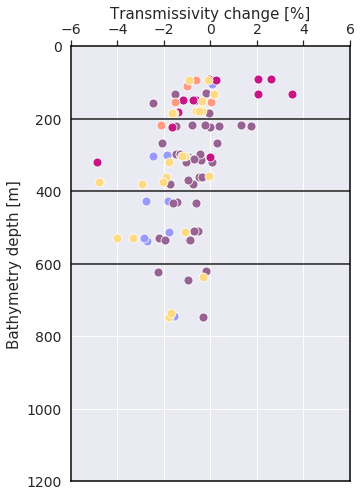

In [78]:
fig, ax1 = plt.subplots(1,1,figsize=(5,8))

c  = ['#feda84', '#ff9b83', colors[1], '#976393', colors[3], '#43457f']
st = sns.axes_style("whitegrid")
with st:
    ax = sns.lineplot([-10, 10], [400, 400], color='k')
    sns.lineplot([-10, 10], [600, 600], color='k')
    sns.lineplot([-10, 10], [200, 200], color='k')
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');   
    
    bottom_trans_snsplot(data_array1, depth_diff1, bottom1, cruise1_bathy, c[5])
    bottom_trans_snsplot(data_array2, depth_diff2, bottom2, cruise2_bathy, c[4])
    bottom_trans_snsplot(data_array3, depth_diff3, bottom3, cruise3_bathy, c[3])
    bottom_trans_snsplot(data_array4, depth_diff4, bottom4, cruise4_bathy, c[2])
    bottom_trans_snsplot(data_array5, depth_diff5, bottom5, cruise5_bathy, c[1])
    bottom_trans_snsplot(data_array6, depth_diff6, bottom6, cruise6_bathy, c[0])    
    
    ax.set(ylim=(1200,0), xlim=(-6,6))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.tick_top()
    ax.set_ylabel('Bathymetry depth [m]', fontsize=15)
    ax.set_xlabel('Transmissivity change [%]', fontsize=15)
    
    
#     # entries for legend:
#     ax[0].plot(-20,0, '.', c=c[5], markersize=18, markeredgecolor='k', label='ArcticNet0904a')
#     ax[0].plot(-20,0, '.', c=c[4], markersize=18, markeredgecolor='k', label='ArcticNet1003b')
#     ax[0].plot(-20,0, '.', c=c[3], markersize=18, markeredgecolor='k', label='ArcticNet0904a')
#     ax[0].plot(-20,0, '.', c=c[2], markersize=18, markeredgecolor='k', label='ArcticNet1101')
#     ax[0].plot(-20,0, '.', c=c[1], markersize=18, markeredgecolor='k', label='ArcticNet1001b')
#     ax[0].plot(-20,0, '.', c=c[0], markersize=18, markeredgecolor='k', label='ArcticNet1103b')
#     ax[0].legend(fontsize=14, frameon=False)
    
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/resuspension.png', bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(figsize=(6,8))

ax.invert_yaxis()

for i in range(0,len(sed_diffs1)):
    ax.plot(sed_diffs1[i], depth_filt1[i,np.nanargmax(depth_filt1[i,:,0]),0], '.', markersize=10)
    
for i in range(0,len(sed_diffs2)):
    ax.plot(sed_diffs2[i], depth_filt2[i,np.nanargmax(depth_filt2[i,:,0]),0], '.', markersize=10)
    
for i in range(0,len(sed_diffs3)):
    ax.plot(sed_diffs3[i], depth_filt3[i,np.nanargmax(depth_filt3[i,:,0]),0], '.', markersize=10)
    
for i in range(0,len(sed_diffs5)):
    ax.plot(sed_diffs5[i], depth_filt5[i,np.nanargmax(depth_filt5[i,:,0]),0], '.', markersize=10)
#     print(sed_diffs1[i])
#     print(depth_filt1[i,np.nanargmax(depth_filt1[i,:,0]),0])
ax.set_ylabel('Bottom depth [m]')
ax.set_xlabel('Transmissivity derivative')
ax.set_ylim([1000, 0]);

### Parameterization:

Magnitude from sediment diffusion representation with a Gaussian (mol/L/s):

\begin{equation}
Mn_{resuspension} = a \cdot e^\frac{-(z_{bottom}+ 450)^2}{2\cdot(300)^2} = a\cdot e^\frac{-(z_{bottom}+ 450)^2}{1.8\cdot 10^5}
\end{equation}

For a 1 nmol of Mn increase at the bottom per day, you would need:

In [68]:
(1e-9/(24*3600))# (nmol / s)

1.1574074074074075e-14

In [71]:
m      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc')
mdepth = np.array(m.variables['deptht'])
mlons  = np.array(m.variables['nav_lon'])
mlats  = np.array(m.variables['nav_lat'])

In [73]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Text(0, 0.5, 'Bottom depth')

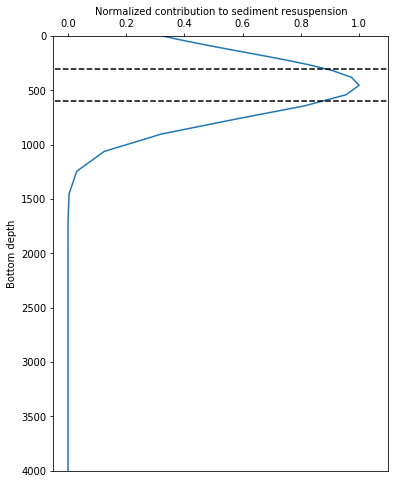

In [52]:
fig, ax = plt.subplots(1,1, figsize=(6,8))
ax.invert_yaxis()
ax.plot(gaussian(mdepth, 650, 300), mdepth)

# Reference lines
ax.plot([-0.1, 1.1], [300, 300], '--k')
ax.plot([-0.1, 1.1], [600, 600], '--k')

# Settings:
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_xlim([-0.05, 1.1])
ax.set_ylim([4000, 0])
ax.set_xlabel('Normalized contribution to sediment resuspension')
ax.set_ylabel('Bottom depth')